
# Linear Algebra 

### Motivation

Linear algebra deals with vectors, matrices and tensors. Before using machine learning to solve a problem, the first step is usually to represent the real-world input in the form of vectors/matrices of numbers. Following are the key reasons why linear algebra will be found everywhere throughout this course:

**Compact Notation** Linear algebra provides a convenient language for compactly representing computations which may otherwise require more verbose expressions. Getting familiar with these notations will give you access to several books and literatures in the domain of machine learning and deep learning.

**Standard Representation** In many important domains, data is naturally available in digital form. Speech, audio/video, images from social network to medical scans, etc. This kind of data can be readily be represented in vector or matrix forms, thus making vectors and matrices the most preferred input formats. Most machine learning libraries assume the input data structure to be matrices or tensors. 

**Fast Computation** Representing computations in the form of linear algebra equations enables underlying machine learning libraries to take advantage of fast matrix computation routines. Further more, frameworks like Tensorflow, can leverage distributed systems and GPUs to run matrix computations much faster. While what can be done with matrix operations can also be done using for loops, the speed difference between the two options is extremely significant.


```python
from sympy import *
import numpy as np

r = r'$%s$'%latex(Matrix(np.arange(3).reshape(1,-1)))
c = r'$%s$'%latex(Matrix(np.arange(3).reshape(-1,1)))
m = r'$%s$'%latex(Matrix(np.arange(12).reshape(3,4)))

```

### Terms & Notations

**Scalars** are 0 dimensional. They are just numbers. For example, height of a  person, temperature, stock price etc. They are represented using lower case letters as $x,y,x_1,w_5$ etc.

**Vectors** are 1 dimensional. Meaning, you can represent them as a collection of numbers. For example, to represent a color of pixel in an image, we will need three numbers, r, g and b. That is single color, $\mathbf{c} = [r,g,b]$. Vectors are denoted by boldface, lower case letters, like $\mathbf{x,y,z,w,v}$. While one dimensional array of numbers can be either row vector, {{r}} or column vector {{c}}, by convention, vector is taken to be a column vector.

**Matrices** Matrices are 2 dimensional array of numbers. For example a matrix {{m}} is a $\mathrm{3x4}$ array of numbers. That is, it has 3 rows and 4 columns. A gray scale image, for example, is represented as a matrix of size $\mathrm{width\ x\ height}$. A collection of document vectors can be represented as a matrix.

**Tensors** Higher dimensional arrays are called Tensors. They are generalisation of vectors and matrices. However, note that a whole lot of linear algebra computations like matrix multiplication, SVD, determinants etc. are not defined or are not used with Tensors. A color image is represented as $\mathrm{w x h x c}$ array, which is a tensor. A training data may involve 1000s of such arrays in a single bigger tensor of dimensions $\mathrm{N x w x h x c}$. In Tensorflow, the data is represented as generic tensors. We will see more of that soon.

### Numpy

Numpy is a python library for numerical computations, with rich support for linear algebra computations among lot of other things. It is essential to have a deep working expertise with numpy. Most numpy operations have equivalent operations in Tensorflow as well.


### Matrix operations in Action 1 - Slicing an Image to extract R,G,B channels

Try the following code.

```python
%matplotlib inline
import skimage.data as imgdata
import matplotlib.pyplot as plt
import numpy as np

astronaut = imgdata.astronaut()

#Please take the opportunity to get familiar with matplotlib and numpy operations used in sample codes.
R = astronaut[:,:,0] #0th channel is R, 1st channel is G, and 2nd channel will be red
G = astronaut[:,:,1]
B = astronaut[:,:,2]

plt.subplot(1,4,1) #We want to show the images as 1 row, 4 columns, the last number indicating that we are about to draw the first image
plt.imshow(astronaut)
plt.title('Color')
plt.axis('off') #When showing images, we don't need axes. They clutter the display with axis labels.

plt.subplot(1,4,2) #Now we are setting the context to draw the R channel of the image
plt.imshow(R,'gray')
plt.title('Red Levels')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(G,'gray')
plt.title('Green Levels')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(B,'gray')
plt.title('Blue Levels')
plt.axis('off')

plt.suptitle('Image and its Color Channels')
plt.show()
```

### Matrix operations in Action 2 - Weighted average of pixels to convert a color image into grayscale
```python
%matplotlib inline
import skimage.data as imgdata
import matplotlib.pyplot as plt

coffee_cup = imgdata.coffee()

#Please take the opportunity to get familiar with matplotlib and numpy operations used in sample codes.
R = coffee_cup[:,:,0] #0th channel is R, 1st channel is G, and 2nd channel will be red
G = coffee_cup[:,:,1]
B = coffee_cup[:,:,2]

I = 0.2125*R + 0.7154*G + 0.0721*B #Gray scale image is a weighted average of R, G and B values of the pixels. All pixels of I are simultaneously computed with this elementwise addition

plt.subplot(1,2,1)
plt.imshow(coffee_cup)
plt.title('Color Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(I,'gray') #Even though I is a grayscale image, we have to set the colormap to "gray". Otherwise matplotlib will show the gray values using multicolor pallete, chosing color based on the intensity value
plt.title('Grayscale Image')
plt.axis('off')

plt.show()
```

### Matrix operations in Action 3 - Finding the mean of 1000 images in one numpy operation
Surprisingly, the mean face, which is an average of random faces appears to have very symmetric features. Try this code that averages 1000 different faces:
```python
%matplotlib inline

import numpy as np
import pickle

faces = pickle.load(open('faces.pkl'))

(num_of_images,height,width,clr_channels) = faces.shape #First dimension shows the number of face images we have.

#Lets select 30 images randomly, and display them in 3x10 plot. You may want to understand this code

idxList = np.random.randint(0,num_of_images,30) #Please check the documentation of np.random.randint for help. Type 'np.random.randint?' in iPython 

for i,idx in enumerate(idxList): #Check if sampled images change everytime you run the cell
    plt.subplot(3,10,i+1)
    plt.imshow(faces[idx])
    plt.axis('off')
plt.suptitle('Sample Images from the Dataset')
plt.show()

m = np.mean(faces,0)
m = m.astype(np.uint8) #Matplotlib expects the images to be of uint8 type, meaning RGB values should be integers in the range of 0 to 255. Else the image displayed looks like garbage
plt.imshow(m)
plt.axis('off')
plt.title('Mean of 1000 Faces - Surprising?')
plt.show()
```


### Matrix operations in Action 4 - Datatype checking, Casting, Counting etc.
```python
import numpy as np

A = np.random.rand(3,6)
print "Shape of A:", A.shape #3x6
print
print "Uniform Random Numbers"
print A #array of 3 rows, 6 columns, uniform random numbers
print
print "Sometimes it is clumsy to inspect arrays, with so many decimal places printed on the screen"
print "We can control the numpy printing options as below"
np.set_printoptions(precision=2)
print A
print "Pleas note! It doesn't round the numbers, but only printing is controlled!"
print A.dtype #64 bit floating point number

#How to generate an array of random integers between 5 to 20, of size 5x10?

#Method 1. We can use uniform random numbers between 0 to 1 and scale them to the required range.
#Then we can convert the scaled array to integers

A = np.random.rand(5,10) #Uniform random numbers between 0 to 1, of size 5x10
A = A*(20-5) + 5 #Scale and shift the values to fit in the range of 5 to 20
print
print "Values are now between 5 to 20, but floating point."
print "Note that A is still printed upto 2 decimal places. np.set_printoptions is a global setting."
print A #A is in the required range, but it is of type floating point
print "Datatype of A is ", A.dtype
print "Casting A to 16 bit integer values"
A = A.astype(np.int16)
print A #Now A is the desired output
print A.dtype #This should be np.int16
print
print "Are they really in 5 to 20 range?"
print "The unique values in A are:", np.unique(A) #This will tell us what are the unique values present in the array
print "Are they really unform? We can count how many times each number is appearing. That should be roughly equal."
counts = np.bincount(A.flatten()) #np.bincount takes only one dimension array. A.flatten() will flatten n-dimension array into a 1d array
print "counts will be a 1d array of size np.max(A). counts[i] tells us how many times the number i has appeared in the input"
print counts[5:] #We are interested in counts of numbers between 5 to 20 only.
print "We can plot the counts and check. The numbers are not roughly equal! Why?"
print "Change the code to check if it helps if you generate much bigger sample."
```

### Matrix operations in Action 5 - Zeros, Ones, Linspace,Elementwise computations

```python
import numpy as np

A = np.zeros(shape=(5,5))
print A
print
B = np.ones((3,5))
print B
print
x = np.linspace(-2*np.pi,2*np.pi,100) #x is a linearly spaced, 100 numbers between -2*pi to +2*pi
y = np.sin(x) #All scalar math functions in numpy apply to every element in the input, element wise. No need for for loop to call sin function on every value.
print 'x values:',x[:10] #Show only first 10 values.
print 'y values:',y[:10]
print 'You can zip x and y values together: '
points = zip(x,y) #Useful python function to combine corresponding elements in two 1d arrays into list of tuples.
print points[:10] #Note, the values are now printed beyond 2 decimals. Can you reason why?
print
print "Plot:"
plt.plot(x,y)
plt.show()
```



### Matrix operations in Action 6- Broadcasting

In math, two matrices can be added only if they both are of same dimension. Numpy does allow adding matrices of different dimensions under certain conditions. This is called broadcasting. It is important to understand how broadcasting in numpy works, one to avoid unintended effects causing bugs, two, to achieve computational efficiency. 

You can learn about broadcasting works on [this page](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc)

Run the following code to see the benefits of broadcasting.

```python
import numpy as np
import time

A = np.random.rand(10000,100) #10000x100 array of random numbers
B = np.ones((1,100))*10 #B is a a 1x100 array of 10s

#Suppose we want to add B to every row of A.
#In matrix algebra, A+B is forbidden. We need to replicate B 10000 times and make an array of size compatible to A, and then add

#Lets see how fast this code is. We will run this 1000 times and average the time.
start = time.time()
for i in range(1000):
    B1 = np.repeat(B,10000,axis=0) #Repeat 10000 times along rows (axis=0)
    S = A+B1 #desired output
stop = time.time()

total_time1 = stop-start
print "Average execution time to compute the desired output: ", total_time1/1000

print "With Numpy broadcasting, we save memory and time."
start = time.time()
for i in range(1000):
    S = A+B #Numpy will automatically broadcast the values in a compatible way. Important to understand the rules to avoid unintended bugs
stop = time.time()
total_time2 = stop-start
print "Total time taken for 1000 executions of A+B with broadcasting is: ",total_time2/100

print "Broadcasting is %s times faster for this case."%(total_time1/total_time2)
```

### Matrix operations in Action 7 - Boolean Indexing 
```python
%matplotlib inline
import skimage.data as imgdata
import matplotlib.pyplot as plt
import numpy as np

horse = imgdata.horse()
horse = horse[:,:,:3] #Drop the A channel
#This is a RGBA image. Convert it into Binary
horse = np.max(horse,2)
#Horse is a binary image, with values 0 an 1. You can inspect the values of the image
print 'Min and Max values in the horse image'
np.min(horse),np.max(horse)
#Let's make the horse red and background black, using boolean indexing to operate on the image
I,J = np.nonzero(horse==0) #Boolean indexing finds all (i,j)s in the image where the pixels are black(0), giving us the indices of horse pixels
#We will make R, G, and B panels separately and put them together to make color image
R = np.zeros_like(horse) #Make zeros of same type and shape as the horse array
R[I,J] = 255 #Red panel we have set
output = np.zeros((horse.shape[0],horse.shape[1],3),dtype=horse.dtype)
output[:,:,0] = R
#G and B channels are zeros. So we get a red horse and black background.

plt.subplot(1,2,1)
plt.title('Input')
plt.axis('off')
plt.imshow(horse,'gray')


plt.subplot(1,2,2)
plt.title('output')
plt.axis('off')
plt.imshow(output,'gray')

plt.show()
```

### Matrix operations in Action 8 - Dot Product, Least Squares Error
```python
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
images = digits['images']
num_images = images.shape[0]

print "Shape of images array is: ", images.shape

#The images array contains N number of 8x8 binary digit images, this is a 3 dimensional array
#We will flatten 8x8 images into 64 dimensional vector for each image, stacked as image vectors
image_vectors = images.reshape(-1,64)
#image_vectors will be of shape N x 64

rand_idx = np.random.randint(0,num_images,1)[0]
sample = images[rand_idx,:].flatten() #Radomly select a sample image

#Let's take a random digit image, and find top 30 digits from the images that are closest to this.
#To measure closeness, we will use euclidean distance.
images_diff = image_vectors - sample #Check the shapes of image_vectors and sample, and understand how broadcasting is at work here
distances = np.sum(images_diff**2,1) #Elementwise square all the differeneces and add them across columns to get distances

#Find indices of smallest distances. We can use argsort, which gives you sorted indices.
sorted_idxes = np.argsort(distances)
#these indices can be used to select the corresponding images from the original images 

nearest_images = images[sorted_idxes,:,:][:20] #Last line truncates selects the nearest 20

plt.subplot(5,5,1) #1 row for the input image, and 5 rows for 50 output images
plt.imshow(images[rand_idx],'gray',interpolation='nearest')
plt.axis('off')
plt.title('Input Sample')

loc = 6 #Start from the second row
for i,img in enumerate(nearest_images):
    plt.subplot(5,5,loc+i)
    plt.imshow(img,'gray',interpolation='nearest')
    plt.title('d = %0.0f'%distances[sorted_idxes[i]]) #Make sure you understand how we are reading the corresponding distance
    plt.axis('off')

plt.tight_layout()
plt.show()

```

In [1]:
from sympy import *
import numpy as np

r = r'$%s$'%latex(Matrix(np.arange(3).reshape(1,-1)))
c = r'$%s$'%latex(Matrix(np.arange(3).reshape(-1,1)))
m = r'$%s$'%latex(Matrix(np.arange(12).reshape(3,4)))

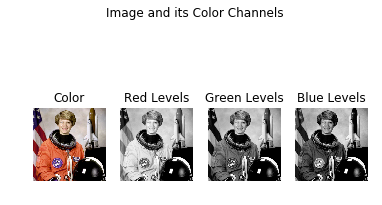

In [2]:
%matplotlib inline
import skimage.data as imgdata
import matplotlib.pyplot as plt
import numpy as np

astronaut = imgdata.astronaut()

#Please take the opportunity to get familiar with matplotlib and numpy operations used in sample codes.
R = astronaut[:,:,0] #0th channel is R, 1st channel is G, and 2nd channel will be red
G = astronaut[:,:,1]
B = astronaut[:,:,2]

plt.subplot(1,4,1) #We want to show the images as 1 row, 4 columns, the last number indicating that we are about to draw the first image
plt.imshow(astronaut)
plt.title('Color')
plt.axis('off') #When showing images, we don't need axes. They clutter the display with axis labels.

plt.subplot(1,4,2) #Now we are setting the context to draw the R channel of the image
plt.imshow(R,'gray')
plt.title('Red Levels')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(G,'gray')
plt.title('Green Levels')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(B,'gray')
plt.title('Blue Levels')
plt.axis('off')

plt.suptitle('Image and its Color Channels')
plt.show()

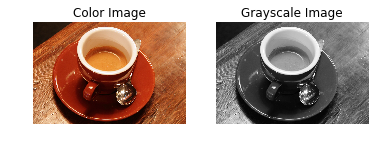

In [3]:
%matplotlib inline
import skimage.data as imgdata
import matplotlib.pyplot as plt

coffee_cup = imgdata.coffee()

#Please take the opportunity to get familiar with matplotlib and numpy operations used in sample codes.
R = coffee_cup[:,:,0] #0th channel is R, 1st channel is G, and 2nd channel will be red
G = coffee_cup[:,:,1]
B = coffee_cup[:,:,2]

I = 0.2125*R + 0.7154*G + 0.0721*B #Gray scale image is a weighted average of R, G and B values of the pixels. All pixels of I are simultaneously computed with this elementwise addition

plt.subplot(1,2,1)
plt.imshow(coffee_cup)
plt.title('Color Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(I,'gray') #Even though I is a grayscale image, we have to set the colormap to "gray". Otherwise matplotlib will show the gray values using multicolor pallete, chosing color based on the intensity value
plt.title('Grayscale Image')
plt.axis('off')

plt.show()

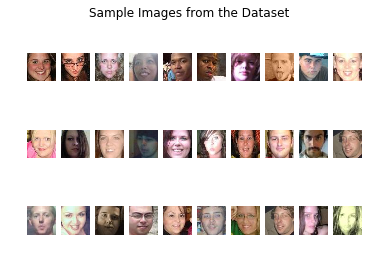

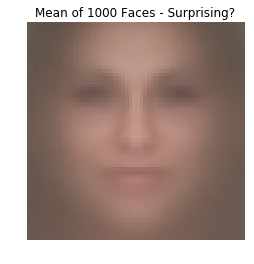

In [4]:
%matplotlib inline

import numpy as np
import pickle

faces = pickle.load(open('Linear Algebra KB v1.0/faces.pkl'))

(num_of_images,height,width,clr_channels) = faces.shape #First dimension shows the number of face images we have.

#Lets select 30 images randomly, and display them in 3x10 plot. You may want to understand this code

idxList = np.random.randint(0,num_of_images,30) #Please check the documentation of np.random.randint for help. Type 'np.random.randint?' in iPython 

for i,idx in enumerate(idxList): #Check if sampled images change everytime you run the cell
    plt.subplot(3,10,i+1)
    plt.imshow(faces[idx])
    plt.axis('off')
plt.suptitle('Sample Images from the Dataset')
plt.show()

m = np.mean(faces,0)
m = m.astype(np.uint8) #Matplotlib expects the images to be of uint8 type, meaning RGB values should be integers in the range of 0 to 255. Else the image displayed looks like garbage
plt.imshow(m)
plt.axis('off')
plt.title('Mean of 1000 Faces - Surprising?')
plt.show()

In [5]:
import numpy as np

A = np.random.rand(3,6)
print "Shape of A:", A.shape #3x6
print
print "Uniform Random Numbers"
print A #array of 3 rows, 6 columns, uniform random numbers
print
print "Sometimes it is clumsy to inspect arrays, with so many decimal places printed on the screen"
print "We can control the numpy printing options as below"
np.set_printoptions(precision=2)
print A
print "Pleas note! It doesn't round the numbers, but only printing is controlled!"
print A.dtype #64 bit floating point number

#How to generate an array of random integers between 5 to 20, of size 5x10?

#Method 1. We can use uniform random numbers between 0 to 1 and scale them to the required range.
#Then we can convert the scaled array to integers

A = np.random.rand(500,1000) #Uniform random numbers between 0 to 1, of size 5x10
A = A*(20-5) + 5 #Scale and shift the values to fit in the range of 5 to 20
print
print "Values are now between 5 to 20, but floating point."
print "Note that A is still printed upto 2 decimal places. np.set_printoptions is a global setting."
print A #A is in the required range, but it is of type floating point
print "Datatype of A is ", A.dtype
print "Casting A to 16 bit integer values"
A = A.astype(np.int16)
print A #Now A is the desired output
print A.dtype #This should be np.int16
print
print "Are they really in 5 to 20 range?"
print "The unique values in A are:", np.unique(A) #This will tell us what are the unique values present in the array
print "Are they really unform? We can count how many times each number is appearing. That should be roughly equal."
counts = np.bincount(A.flatten()) #np.bincount takes only one dimension array. A.flatten() will flatten n-dimension array into a 1d array
print "counts will be a 1d array of size np.max(A). counts[i] tells us how many times the number i has appeared in the input"
print counts[5:] #We are interested in counts of numbers between 5 to 20 only.
print "We can plot the counts and check. The numbers are not roughly equal! Why?"
print "Change the code to check if it helps if you generate much bigger sample."


Shape of A: (3, 6)

Uniform Random Numbers
[[ 0.53026842  0.85568589  0.59917602  0.13160372  0.82012804  0.36597499]
 [ 0.68449891  0.25387986  0.55686847  0.55368587  0.85834321  0.48071346]
 [ 0.26787755  0.25289669  0.21857296  0.83156644  0.56501215  0.57388012]]

Sometimes it is clumsy to inspect arrays, with so many decimal places printed on the screen
We can control the numpy printing options as below
[[ 0.53  0.86  0.6   0.13  0.82  0.37]
 [ 0.68  0.25  0.56  0.55  0.86  0.48]
 [ 0.27  0.25  0.22  0.83  0.57  0.57]]
Pleas note! It doesn't round the numbers, but only printing is controlled!
float64

Values are now between 5 to 20, but floating point.
Note that A is still printed upto 2 decimal places. np.set_printoptions is a global setting.
[[  7.81  18.93   6.21 ...,  19.72  17.44  18.95]
 [ 11.42  18.6   14.93 ...,   7.79   8.07  10.11]
 [ 16.4   17.86  14.55 ...,  18.49  15.98  14.67]
 ..., 
 [ 18.67   6.67   8.71 ...,  10.98  10.91  13.49]
 [ 15.5    8.98  18.79 ...,   8.5

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]

x values: [-6.28 -6.16 -6.03 -5.9  -5.78 -5.65 -5.52 -5.39 -5.27 -5.14]
y values: [  2.45e-16   1.27e-01   2.51e-01   3.72e-01   4.86e-01   5.93e-01
   6.90e-01   7.76e-01   8.50e-01   9.10e-01]
You can zip x and y values together: 
[(-6.2831853071795862, 2.4492935982947064e-16), (-6.1562522706709073, 0.12659245357374993), (-6.0293192341622293, 0.25114798718107939), (-5.9023861976535503, 0.37166245566032807), (-5.7754531611448723, 0.48619673610046882), (-5.6485201246361934, 0.59290792905464096), (-5.5215870881275153, 0.69007901148211204), (-5.3946540516188364, 0.77614646429175715), (-5.2677210151101583, 0.84972542994951439), (-5.1407879786014794, 0.90963199535451855)]

Plot:


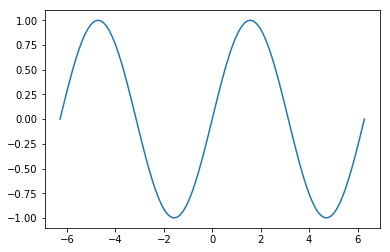

In [6]:
import numpy as np

A = np.zeros(shape=(5,5))
print A
print
B = np.ones((3,5))
print B
print
x = np.linspace(-2*np.pi,2*np.pi,100) #x is a linearly spaced, 100 numbers between -2*pi to +2*pi
y = np.sin(x) #All scalar math functions in numpy apply to every element in the input, element wise. No need for for loop to call sin function on every value.
print 'x values:',x[:10] #Show only first 10 values.
print 'y values:',y[:10]
print 'You can zip x and y values together: '
points = zip(x,y) #Useful python function to combine corresponding elements in two 1d arrays into list of tuples.
print points[:10] #Note, the values are now printed beyond 2 decimals. Can you reason why?
print
print "Plot:"
plt.plot(x,y)
plt.show()

In [7]:
import numpy as np
import time

A = np.random.rand(10000,100) #10000x100 array of random numbers
B = np.ones((1,100))*10 #B is a a 1x100 array of 10s

#Suppose we want to add B to every row of A.
#In matrix algebra, A+B is forbidden. We need to replicate B 10000 times and make an array of size compatible to A, and then add

#Lets see how fast this code is. We will run this 1000 times and average the time.
start = time.time()
for i in range(1000):
    B1 = np.repeat(B,10000,axis=0) #Repeat 10000 times along rows (axis=0)
    S = A+B1 #desired output
stop = time.time()

total_time1 = stop-start
print "Average execution time to compute the desired output: ", total_time1/1000

print "With Numpy broadcasting, we save memory and time."
start = time.time()
for i in range(1000):
    S = A+B #Numpy will automatically broadcast the values in a compatible way. Important to understand the rules to avoid unintended bugs
stop = time.time()
total_time2 = stop-start
print "Total time taken for 1000 executions of A+B with broadcasting is: ",total_time2/1000

print "Broadcasting is %s times faster for this case."%(total_time1/total_time2)

Average execution time to compute the desired output:  0.0118508088589
With Numpy broadcasting, we save memory and time.
Total time taken for 1000 executions of A+B with broadcasting is:  0.00538574504852
Broadcasting is 2.20040286945 times faster for this case.


Min and Max values in the horse image
0 1


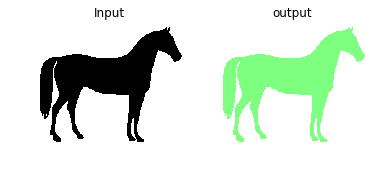

In [8]:
%matplotlib inline
import skimage.data as imgdata
import matplotlib.pyplot as plt
import numpy as np

horse = imgdata.horse().astype(np.uint8)
# horse = horse[:,:,:3] #Drop the A channel
#This is a RGBA image. Convert it into Binary
# horse = np.max(horse,2)
#Horse is a binary image, with values 0 an 1. You can inspect the values of the image
print 'Min and Max values in the horse image'
print np.min(horse),np.max(horse)
#Let's make the horse red and background black, using boolean indexing to operate on the image
I,J = np.nonzero(horse==0) #Boolean indexing finds all (i,j)s in the image where the pixels are black(0), giving us the indices of horse pixels
#We will make R, G, and B panels separately and put them together to make color image
# R = np.zeros_like(horse) #Make zeros of same type and shape as the horse array
# R[I,J] = 255#ed panel we have set
# R.shape
# B = np.zeros_like(horse) #Make zeros of same type and shape as the horse array
# B[I,J] = 128 #Red panel we have set
colored_horse = np.ones((horse.shape[0],horse.shape[1],3),dtype=horse.dtype)*255
colored_horse[I,J] = np.array([127,255,128])#ed panel we have set
output = colored_horse
# output[:,:,0] = R
#G and B channels are zeros. So we get a red horse and black background.

plt.subplot(1,2,1)
plt.title('Input')
plt.axis('off')
plt.imshow(horse,'gray')


plt.subplot(1,2,2)
plt.title('output')
plt.axis('off')
plt.imshow(output,'gray')

plt.show()

Shape of images array is:  (1797, 8, 8)


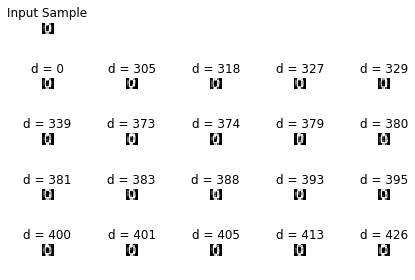

In [9]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
images = digits['images']
num_images = images.shape[0]

print "Shape of images array is: ", images.shape

#The images array contains N number of 8x8 binary digit images, this is a 3 dimensional array
#We will flatten 8x8 images into 64 dimensional vector for each image, stacked as image vectors
image_vectors = images.reshape(-1,64)
#image_vectors will be of shape N x 64

rand_idx = np.random.randint(0,num_images,1)[0]
sample = images[rand_idx,:].flatten() #Radomly select a sample image

#Let's take a random digit image, and find top 30 digits from the images that are closest to this.
#To measure closeness, we will use euclidean distance.
images_diff = image_vectors - sample #Check the shapes of image_vectors and sample, and understand how broadcasting is at work here
distances = np.sum(images_diff**2,1) #Elementwise square all the differeneces and add them across columns to get distances

#Find indices of smallest distances. We can use argsort, which gives you sorted indices.
sorted_idxes = np.argsort(distances)
#these indices can be used to select the corresponding images from the original images 

nearest_images = images[sorted_idxes,:,:][:20] #Last line truncates selects the nearest 20

plt.subplot(5,5,1) #1 row for the input image, and 5 rows for 50 output images
plt.imshow(images[rand_idx],'gray',interpolation='nearest')
plt.axis('off')
plt.title('Input Sample')

loc = 6 #Start from the second row
for i,img in enumerate(nearest_images):
    plt.subplot(5,5,loc+i)
    plt.imshow(img,'gray',interpolation='nearest')
    plt.title('d = %0.0f'%distances[sorted_idxes[i]]) #Make sure you understand how we are reading the corresponding distance
    plt.axis('off')

plt.tight_layout()
plt.show()

(1000, 60, 60)


(-0.5, 59.5, 59.5, -0.5)

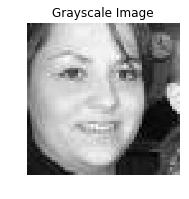

In [36]:
%matplotlib inline

import numpy as np
import pickle
import matplotlib.pyplot as plt

faces = pickle.load(open('Linear Algebra KB v1.0/faces.pkl'))

(num_of_images,height,width,clr_channels) = faces.shape 

#grayscaler = lambda x : 0.2125*x[:,:,:,0] + 0.7154*x[:,:,:,1] + 0.0721*x[:,:,:,2]
# face_channels = faces.reshape(num_of_images*height*width,clr_channels)
#gray_faces = grayscaler(faces)#.reshape(num_of_images,height,width)
gray_faces = np.dot(faces,np.array([0.2125,0.7154,0.0721]))
print gray_faces.shape
plt.subplot(1,2,1)
plt.imshow(gray_faces[np.random.randint(num_of_images)],'gray')
plt.title('Grayscale Image')
plt.axis('off')

Shape of images array is:  (1797, 8, 8)
[773]


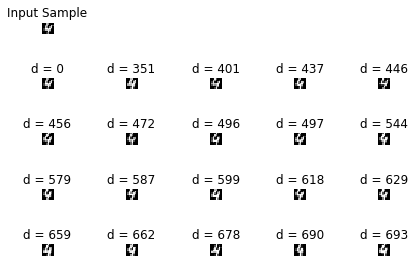

In [37]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
images = digits['images']
num_images = images.shape[0]

print "Shape of images array is: ", images.shape

#The images array contains N number of 8x8 binary digit images, this is a 3 dimensional array
#We will flatten 8x8 images into 64 dimensional vector for each image, stacked as image vectors
image_vectors = images.reshape(-1,64)
#image_vectors will be of shape N x 64

rand_idx = np.random.randint(0,num_images,1)[0]
print(np.random.randint(0,num_images,1))
sample = images[rand_idx,:].flatten() #Radomly select a sample image
samples = images[np.random.choice(images.shape[0],5)].shape

#Let's take a random digit image, and find top 30 digits from the images that are closest to this.
#To measure closeness, we will use euclidean distance.
images_diff = image_vectors - sample #Check the shapes of image_vectors and sample, and understand how broadcasting is at work here
distances = np.sum(images_diff**2,1) #Elementwise square all the differeneces and add them across columns to get distances

#Find indices of smallest distances. We can use argsort, which gives you sorted indices.
sorted_idxes = np.argsort(distances)
#these indices can be used to select the corresponding images from the original images 

nearest_images = images[sorted_idxes,:,:][:20] #Last line truncates selects the nearest 20

plt.subplot(5,5,1) #1 row for the input image, and 5 rows for 50 output images
plt.imshow(images[rand_idx],'gray',interpolation='nearest')
plt.axis('off')
plt.title('Input Sample')

loc = 6 #Start from the second row
for i,img in enumerate(nearest_images):
    plt.subplot(5,5,loc+i)
    plt.imshow(img,'gray',interpolation='nearest')
    plt.title('d = %0.0f'%distances[sorted_idxes[i]]) #Make sure you understand how we are reading the corresponding distance
    plt.axis('off')

plt.tight_layout()
plt.show()

Shape of images array is:  (1797, 8, 8)


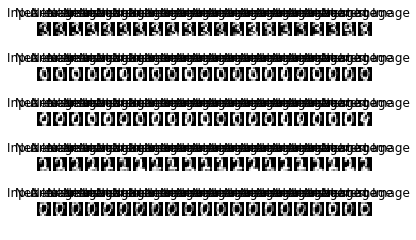

In [133]:
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
images = digits['images']
num_images = images.shape[0]

print "Shape of images array is: ", images.shape

#The images array contains N number of 8x8 binary digit images, this is a 3 dimensional array
#We will flatten 8x8 images into 64 dimensional vector for each image, stacked as image vectors
sample_idx = np.random.choice(images.shape[0],5)
samples = images[sample_idx].reshape(-1,1,64)
square_dist = np.sum((image_vectors - samples)**2,2)
ss = 20
image_nearest = zip(images[sample_idx],images[np.argsort(square_dist)[:,:ss]])
for i,(img,nearest) in enumerate(image_nearest):
    plt.subplot(5,ss+1,(i*(ss+1))+1)
    plt.imshow(img,'gray',interpolation='nearest')
    plt.title('Input Image')
    plt.axis('off')
    for (j,nimg) in enumerate(nearest):
        plt.subplot(5,ss+1,(i*(ss+1)+j+2))
        plt.imshow(nimg,'gray',interpolation='nearest')
        plt.title('Nearest Image')
        plt.axis('off')